In [202]:
import sys
sys.path.append('../')

In [203]:
from scripts.utils import data_path
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
%matplotlib inline

# Catalogs construction

In [204]:
cols_to_retain_photometry = [
'flux_g',
'flux_r',
'flux_z',
'flux_w1',
'flux_w2',
'flux_w3',
'flux_w4',
'mag_g',
'mag_r',
'mag_z',
'mag_w1',
'mag_w2',
'mag_w3',
'mag_w4',
]

cols_to_retain_positional = [
'name_csc',	
'ra_csc',	
'dec_csc', 
'r_98_csc',	
'sep_csc',	
'flux_csc_05_2', 
'desi_id',	
'ra',	
'dec', 
'is_counterpart']

cols_to_retain = cols_to_retain_photometry + cols_to_retain_positional


x_ray_flux_lim = 3e-15


## Counterparts catalog

In [205]:
ctps = pd.read_pickle(data_path+'csc_desi_r50_gaia_ctps.gz_pkl', compression='gzip')
ctps['is_counterpart'] = True


ctps = ctps[ctps['flux_csc_05_2']>x_ray_flux_lim]
ctps_secure = ctps[ctps['counterpart_quality_flag']==1]
ctps_secure = ctps_secure[cols_to_retain]
ctps_secure

,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,name_csc,ra_csc,dec_csc,r_98_csc,sep_csc,flux_csc_05_2,desi_id,ra,dec,is_counterpart
122,0.446684,0.791833,0.833604,2.084917,-1.714462,-19.942390,-1472.021851,23.374999,22.753416,22.697600,21.702278,NaN,NaN,NaN,2CXO J000001.7+003824,0.007351,0.640170,1.598058,0.510857,4.925396e-15,334688_289,0.007209,0.640172,True
706,0.409332,0.494572,1.014339,4.271025,2.108738,-69.947258,-2105.617432,23.469812,23.264425,22.484542,20.923670,21.689943,NaN,NaN,2CXO J000002.4+004444,0.010261,0.745756,1.187993,0.168650,6.223680e-15,334688_428,0.010231,0.745719,True
1151,0.834075,1.629502,2.029589,12.394610,8.341883,151.319443,-9200.514648,22.696987,21.969863,21.731480,19.766918,20.196840,17.050263,NaN,2CXO J000004.2+004038,0.017509,0.677271,1.210327,0.340550,3.489255e-15,334688_728,0.017430,0.677220,True
1528,2.826036,3.806152,4.085902,24.098080,35.776527,-103.290527,7386.880371,21.372056,21.048785,20.971780,19.045044,18.616005,NaN,12.828847,2CXO J000004.5-552604,0.018973,-55.434463,2.599839,0.302039,1.030507e-14,58166_392,0.018886,-55.434395,True
1634,257.798218,611.787598,1161.549072,1052.845337,677.435303,1074.324219,1625.962158,16.471800,15.533499,14.837406,14.944088,15.422831,14.922162,14.472224,2CXO J000004.7+004654,0.019850,0.781780,1.477375,0.341217,3.925906e-15,334688_828,0.019784,0.781712,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256024,6.278951,8.874168,8.415861,18.125969,29.336040,54.009327,1284.944946,20.505282,20.129681,20.187254,19.354247,18.831496,18.168828,14.727789,2CXO J235957.7-500202,359.990615,-50.034094,4.224065,0.588494,3.845601e-15,78287_9171,359.990702,-50.033941,True
5256337,778.613586,1889.442017,3640.944580,2904.606201,1775.454468,640.005005,3943.335938,15.271695,14.309166,13.596965,13.842282,14.376726,15.484542,13.510340,2CXO J235958.8+004206,359.995055,0.701785,1.160584,0.224120,1.783104e-14,336127_9208,359.995000,0.701755,True
5256453,0.432746,1.381305,4.694485,42.080944,44.286907,-24.609457,-1897.328369,23.409416,22.149276,20.821030,18.439786,18.384311,NaN,NaN,2CXO J235958.8+135344,359.995103,13.895651,1.308610,0.318909,9.811305e-15,411695_5258,359.995061,13.895730,True
5256507,0.074758,0.296584,0.988816,11.676180,18.406067,32.301712,610.435791,25.315858,23.819630,22.512211,19.831748,19.337597,18.726936,15.535900,2CXO J235959.1-501331,359.996584,-50.225430,1.286452,0.454278,6.525241e-15,77357_10102,359.996389,-50.225410,True


## Field sources catalog

In [206]:
field_srcs = pd.read_pickle(data_path+'csc_desi_r50_gaia_field.gz_pkl', compression='gzip')
field_srcs['is_counterpart'] = False
field_srcs['flux_csc_05_2'] = np.nan
field_srcs = field_srcs[cols_to_retain]
field_srcs.head(3)

,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,name_csc,ra_csc,dec_csc,r_98_csc,sep_csc,flux_csc_05_2,desi_id,ra,dec,is_counterpart
1565149,0.189063,0.741639,4.032495,1.941204,0.878033,-12.494573,902.820679,24.308482,22.824519,20.986065,21.779822,22.641223,NaN,15.110996,2CXO J051510.9-485934,78.795559,-48.992828,2.575351,27.934446,NaN,81311_5324,78.783779,-48.993511,False
4621492,0.255713,0.647795,2.862386,15.731645,15.284018,-21.552906,308.609467,23.980616,22.971407,21.358180,19.508065,19.539406,NaN,16.276477,2CXO J201128.0-564620,302.867055,-56.772442,1.235851,38.965100,NaN,54815_10708,302.847336,-56.771809,False
5203563,0.069378,0.055542,0.049450,0.723551,2.651465,151.386795,3285.908203,25.396952,25.638450,25.764587,22.851327,21.441285,17.04978,13.708361,2CXO J234559.7-635823,356.498812,-63.973152,1.631902,32.836276,NaN,34119_8815,356.480171,-63.977190,False


In [207]:
#pd.cut(ctps_secure.flux_csc_05_2, bins = [5e-15, 8e-15, 2e-14,  np.inf]).value_counts()

## Joined catalog + color features

In [208]:
photo_cat = pd.concat([ctps_secure, field_srcs])
photo_cat.reset_index(inplace=True)

features_cols = ['mag_g','mag_r','mag_z'] 

features_cols += ['mag_w1', 'mag_w2']

features_cols += ['col_gr', 'col_rz']
features_cols += ['col_zw1', 'col_rw2']


target_col = ['is_counterpart']


photo_cat['col_gr'] = photo_cat['mag_g'] - photo_cat['mag_r']
photo_cat['col_rz'] = photo_cat['mag_r'] - photo_cat['mag_z']
photo_cat['col_zw1'] = photo_cat['mag_z'] - photo_cat['mag_w1']
photo_cat['col_rw2'] = photo_cat['mag_r'] - photo_cat['mag_w2']

photo_cat = photo_cat[features_cols+target_col+['flux_csc_05_2']]

photo_cat = photo_cat.replace([np.inf, -np.inf], np.nan)

photo_cat.dropna(inplace=True, subset = features_cols)

photo_cat.is_counterpart.value_counts()


False    84194
True     36929
Name: is_counterpart, dtype: int64

In [209]:
features_cols+target_col

['mag_g',
 'mag_r',
 'mag_z',
 'mag_w1',
 'mag_w2',
 'col_gr',
 'col_rz',
 'col_zw1',
 'col_rw2',
 'is_counterpart']

# Classifier test/train function

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from copy import copy
from pickle import dump #saving data https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/



def assess_classifier(clf, X_test, y_test, scaler = None):
    if scaler is not None:
        X_test = scaler.transform(X_test)
        

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


    plt.figure(figsize=(10,5))
    ax = sns.histplot(x = clf.predict_proba(X_test)[:,1], hue = y_test.values, bins = 50)
    ax.set(title = 'test sample, '+str(clf), ylabel  = 'probability density', xlabel = 'classifier predicted probability')
    plt.legend(title='Counterpart', labels=['X-ray counterpart', 'Field source'])



    proba_axis = np.linspace(0,1,20)
    completeness = np.ones_like(proba_axis) #fraction of sources classifued as counterparts out of all counterparts
    purity = np.ones_like(proba_axis) #fraction of sources with a correct identification as a X-ray counterpart

    for i,prob_val in tqdm(enumerate(proba_axis)):
        y_pred_tmp = clf.predict_proba(X_test)[:,1] > prob_val
        cm_tmp = confusion_matrix(y_test, y_pred_tmp)
        completeness[i] = cm_tmp[1,1]/(cm_tmp[1,1]+cm_tmp[1,0])
        purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])

    plt.figure(figsize=(10,5))
    plt.plot(proba_axis, completeness, label = 'completeness = [true positives]/[true positives + false positives]')
    plt.plot(proba_axis, purity, label = 'purity = [true positives]/[true positives + false negatives]')
    plt.xlabel('classifier predicted probability')
    plt.ylabel('completeness/purity')
    plt.suptitle('test sample, '+str(clf))
    plt.legend()
    return cm
        

def train_ANN_classifier(data, features_cols, target_col, x_ray_flux_bin=[3e-15,1e-9], train_test_fit_split = 0.3, downsample_field_srcs = True ):
    data = data.copy()
    data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]
    data = data[data.flux_csc_05_2.between(x_ray_flux_bin[0], x_ray_flux_bin[1])]
    data.drop(['flux_csc_05_2'], axis=1, inplace=True)

    #drop field sources to increase the significance of the is_counetrpart == 1 class
    #drop is_counterpart == 0 so that the field sources two-three times more numerous than the x-ray counterparts
    n_ctsp = data[data.is_counterpart==1].shape[0]
    n_field = data[data.is_counterpart==0].shape[0]
    print('n_ctsp:', n_ctsp)
    print('n_field:', n_field)

    if downsample_field_srcs:
        tmp_rat = 2*n_ctsp/n_field
        tmp_rat = np.min([tmp_rat, 1])
        data.drop(data[data['is_counterpart'] == 0].sample(frac=1-tmp_rat).index, inplace=True)

        n_ctsp = data[data.is_counterpart==1].shape[0]
        n_field = data[data.is_counterpart==0].shape[0]
        print('n_ctsp:', n_ctsp)
        print('n_field:', n_field)


    
    data_scaled = data.copy()
    scaler = StandardScaler()
    scaler.fit(data_scaled[features_cols])
    data_scaled[features_cols] = scaler.transform(data_scaled[features_cols])


    X_train, X_test, y_train, y_test = train_test_split(data_scaled[features_cols], data_scaled[target_col[0]], test_size=train_test_fit_split, stratify = data_scaled[target_col[0]])


    nn = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', )
    nn.fit(X_train, y_train)

    cm = assess_classifier(nn, X_test, y_test)

        
    return nn, scaler, cm

In [211]:
data_validation, data_train_test = train_test_split(photo_cat, test_size=0.3, stratify = photo_cat[target_col])


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/1425392663.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 11079
n_field: 25258
n_ctsp: 11079
n_field: 22158
              precision    recall  f1-score   support

       False       0.90      0.93      0.92      6648
        True       0.86      0.79      0.82      3324

    accuracy                           0.89      9972
   macro avg       0.88      0.86      0.87      9972
weighted avg       0.88      0.89      0.88      9972

[[6211  437]
 [ 704 2620]]


0it [00:00, ?it/s]/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/1425392663.py:39: RuntimeWarning: invalid value encountered in long_scalars
  purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])
20it [00:00, 241.20it/s]


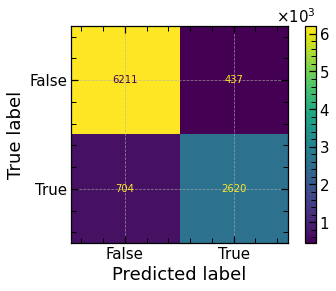

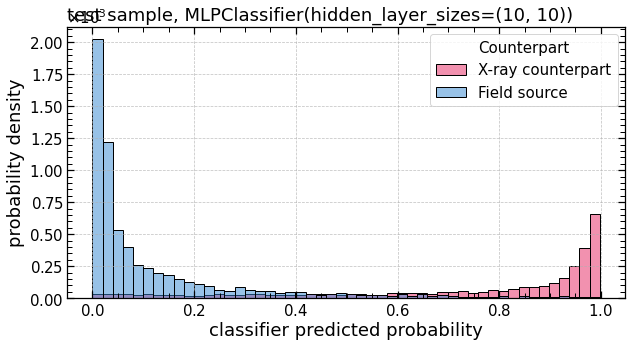

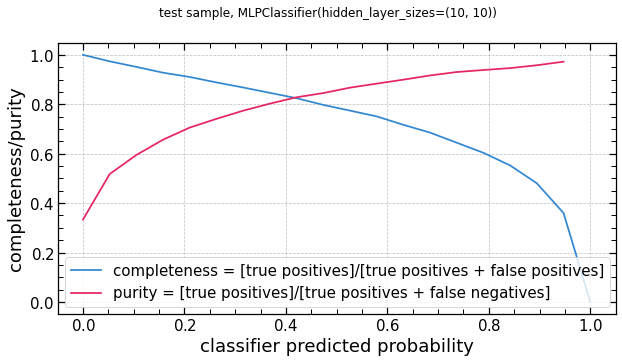

In [222]:
nn, scaler, cm = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[3e-15,6e-10],  train_test_fit_split = 0.3, )

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

       False       0.92      0.93      0.92     58936
        True       0.83      0.81      0.82     25850

    accuracy                           0.89     84786
   macro avg       0.87      0.87      0.87     84786
weighted avg       0.89      0.89      0.89     84786

[[54534  4402]
 [ 4935 20915]]


0it [00:00, ?it/s]/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, bu

array([[54534,  4402],
       [ 4935, 20915]])

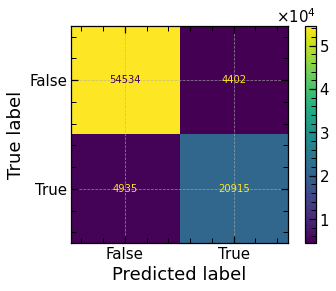

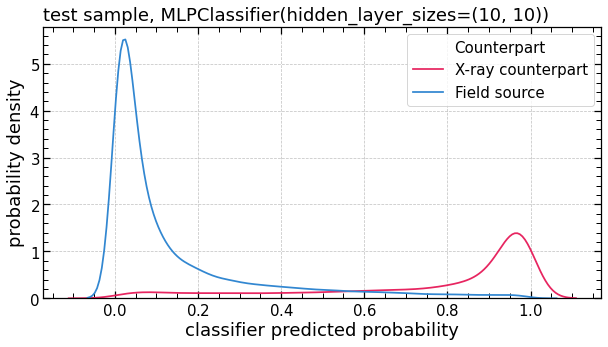

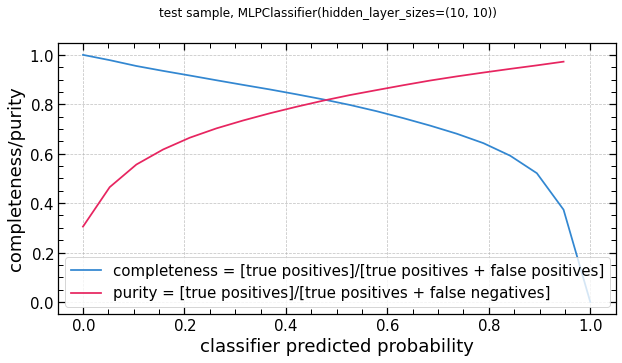

In [214]:
assess_classifier(nn, data_validation[features_cols], data_validation[target_col[0]], scaler)

# Impact of X-ray flux bins

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 11079
n_field: 25258
n_ctsp: 11079
n_field: 22158
              precision    recall  f1-score   support

       False       0.90      0.93      0.92      6648
        True       0.85      0.79      0.82      3324

    accuracy                           0.89      9972
   macro avg       0.88      0.86      0.87      9972
weighted avg       0.88      0.89      0.88      9972

[[6202  446]
 [ 697 2627]]


0it [00:00, ?it/s]/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:40: RuntimeWarning: invalid value encountered in long_scalars
  purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])
20it [00:00, 275.94it/s]


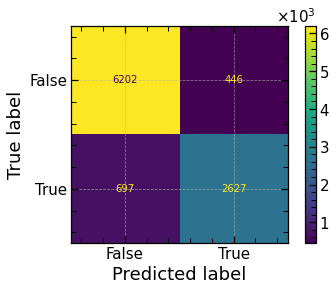

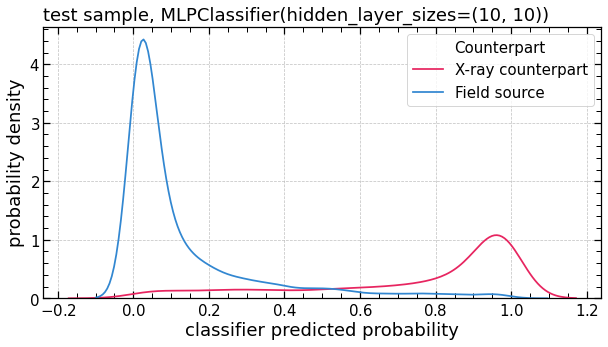

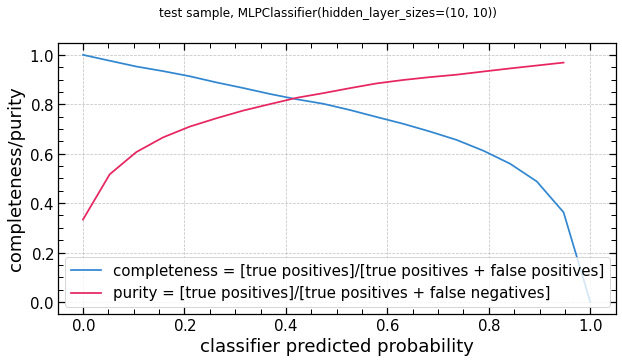

In [217]:
nn, scaler, cm = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[3e-15, 1e-10],  train_test_fit_split = 0.3, )

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 3819
n_field: 25258
n_ctsp: 3819
n_field: 7638
              precision    recall  f1-score   support

       False       0.87      0.91      0.89      2292
        True       0.80      0.73      0.77      1146

    accuracy                           0.85      3438
   macro avg       0.84      0.82      0.83      3438
weighted avg       0.85      0.85      0.85      3438

[[2082  210]
 [ 306  840]]


0it [00:00, ?it/s]/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:40: RuntimeWarning: invalid value encountered in long_scalars
  purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])
20it [00:00, 361.08it/s]


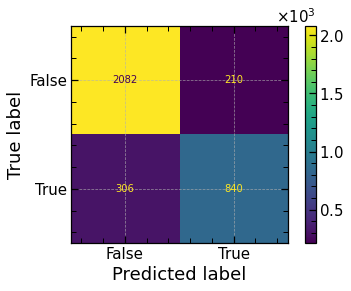

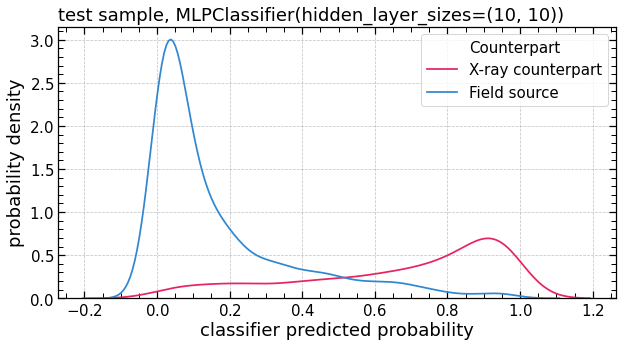

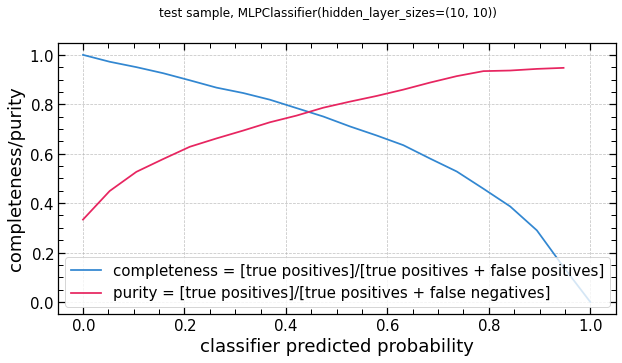

In [218]:
nn, scaler, cm = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[3e-15, 6e-15],  train_test_fit_split = 0.3, )

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 2611
n_field: 25258
n_ctsp: 2611
n_field: 5222


/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.90      0.93      0.92      1567
        True       0.85      0.80      0.83       783

    accuracy                           0.89      2350
   macro avg       0.88      0.87      0.87      2350
weighted avg       0.89      0.89      0.89      2350

[[1458  109]
 [ 154  629]]


0it [00:00, ?it/s]/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:40: RuntimeWarning: invalid value encountered in long_scalars
  purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])
20it [00:00, 415.70it/s]


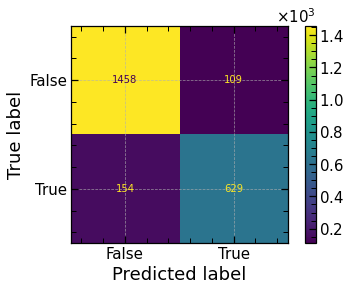

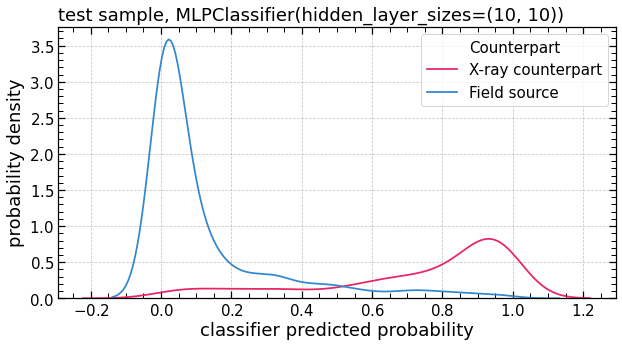

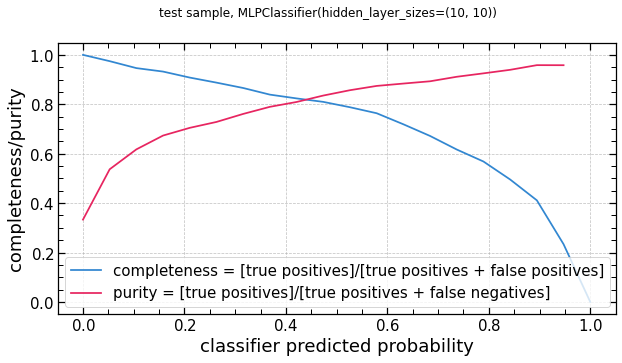

In [219]:
nn, scaler, cm = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[6e-15, 1e-14],  train_test_fit_split = 0.3, )

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


n_ctsp: 4649
n_field: 25258
n_ctsp: 4649
n_field: 9298


/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.94      0.95      0.94      2790
        True       0.90      0.87      0.89      1395

    accuracy                           0.93      4185
   macro avg       0.92      0.91      0.92      4185
weighted avg       0.93      0.93      0.93      4185

[[2658  132]
 [ 178 1217]]


0it [00:00, ?it/s]/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_67117/3901980363.py:40: RuntimeWarning: invalid value encountered in long_scalars
  purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])
20it [00:00, 350.62it/s]


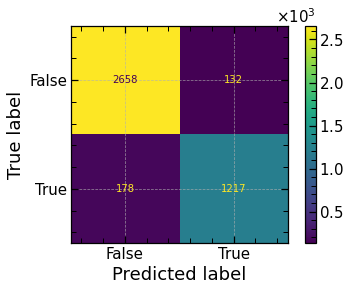

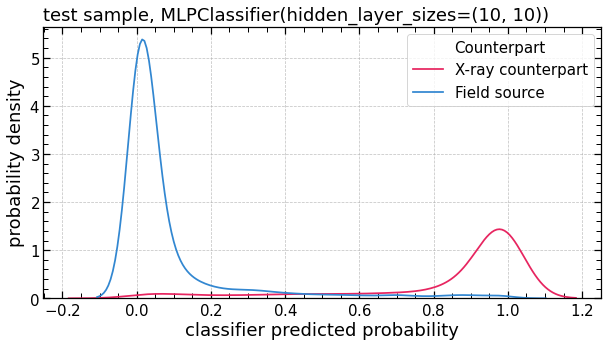

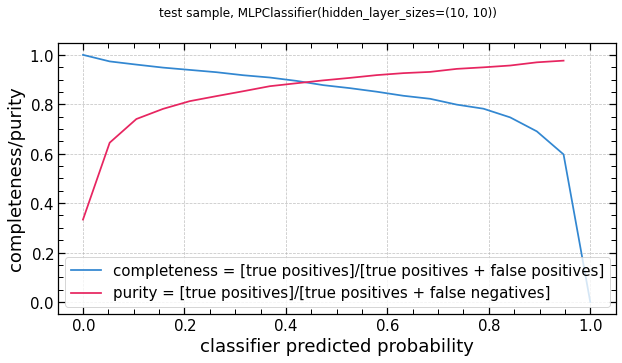

In [220]:
nn, scaler, cm = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[1e-14, 1e-10],  train_test_fit_split = 0.3, )